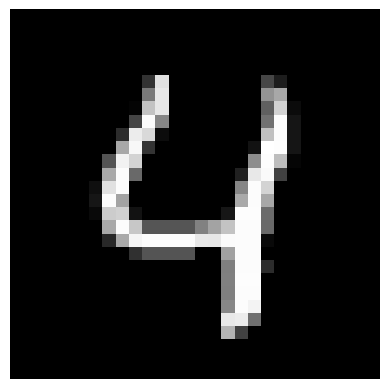

In [1]:
import pandas as pd
from PIL import Image, ImageOps
import numpy as np
import os
import random
import matplotlib.pyplot as plt


csv_file = r"C:\Users\Aaditya\Desktop\ipcv_pracs\data\mnist_test.csv"  # Replace with the provided file name
data = pd.read_csv(csv_file)

labels = data.iloc[:, 0]  # First column: Labels
pixels = data.iloc[:, 1:]  # Remaining columns: Pixel data

# Directory to save images
output_dir = r"C:\Users\Aaditya\Desktop\ipcv_pracs\mnist_images"
os.makedirs(output_dir, exist_ok=True)

for idx, (label, pixel_values) in enumerate(zip(labels, pixels.values)):
    image_array = pixel_values.reshape(28, 28).astype(np.uint8)
    img = Image.fromarray(image_array)
    img.save(f"{output_dir}/{label}_{idx}.png")
    if idx >= 10: 
        break


image_files = [f for f in os.listdir(output_dir) if f.endswith(".png")]
random_image_file = random.choice(image_files)
random_image_path = os.path.join(output_dir, random_image_file)
random_img = Image.open(random_image_path)


plt.imshow(random_img, cmap="gray")
plt.axis('off')  
plt.show()




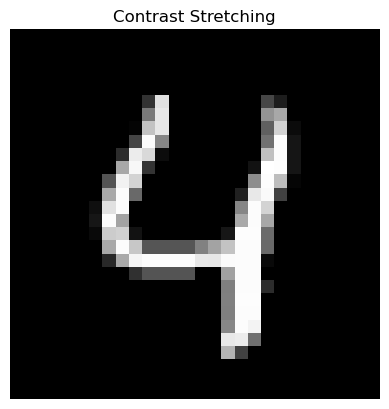

In [2]:
def contrast_stretching(image):
    img_array = np.array(image)
    min_pixel, max_pixel = img_array.min(), img_array.max()
    stretched_img = ((img_array - min_pixel) / (max_pixel - min_pixel)) * 255
    stretched_img = np.uint8(stretched_img)
    return Image.fromarray(stretched_img)

contrast_stretched_img = contrast_stretching(random_img)

# Display the contrast-stretched image
plt.imshow(contrast_stretched_img, cmap='gray')
plt.title("Contrast Stretching")
plt.axis('off')
plt.show()

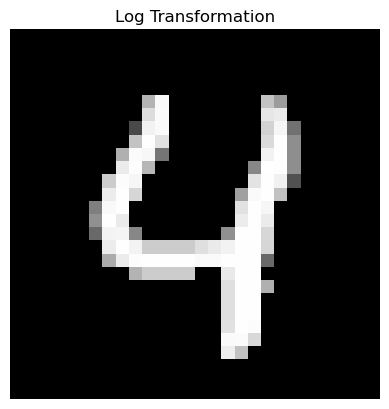

In [3]:
# Step 4: Apply Log Transformation
def log_transformation(image, c=1):
    img_array = np.array(image, dtype=float)
    # Apply log transformation: c * log(1 + pixel_value)
    log_img = c * np.log(1 + img_array)
    log_img = np.uint8(np.interp(log_img, (log_img.min(), log_img.max()), (0, 255)))
    return Image.fromarray(log_img)

log_transformed_img = log_transformation(random_img)
# Display the log-transformed image
plt.imshow(log_transformed_img, cmap='gray')
plt.title("Log Transformation")
plt.axis('off')
plt.show()

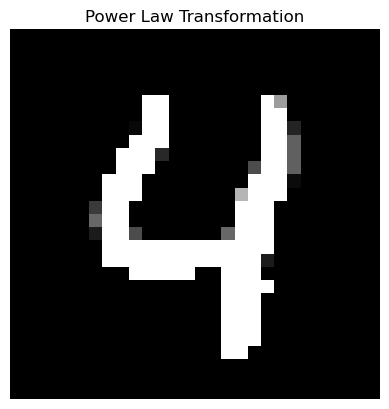

In [4]:
# Step 5: Apply Power Law Transformation
def power_law_transformation(image, gamma=1):
    img_array = np.array(image, dtype=float)
    # Apply power law transformation: pixel_value ** gamma
    power_img = np.uint8(np.interp(np.power(img_array, gamma), (img_array.min(), img_array.max()), (0, 255)))
    return Image.fromarray(power_img)

power_law_img = power_law_transformation(random_img, gamma=1.5)

# Display the power law transformed image
plt.imshow(power_law_img, cmap='gray')
plt.title("Power Law Transformation")
plt.axis('off')
plt.show()
